<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/EjerciciosRegularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=62e11c84c3ea8f458d3ac2a8f644e167966ef9fdf558ab337b3d4980cb4541e7
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

%matplotlib inline
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                           summarize,
                           poly)
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

from functools import partial


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from ISLP.models import (Stepwise, sklearn_selected, sklearn_selection_path)

# Conceptual


## 1

(a) Which of the three models with k predictors has the smallest
training RSS?


cuando k < p entonces el menor sera el best subset, sin embargo cuando k ==p entonces los 3 llegaran al minimo

(b) Which of the three models with k predictors has the smallest
test RSS?

todo dependera de la forma en la que calculamos el test RSS sin embargo dado que el espacio de busqueda y dejando parametros de testeo iguales, el subset deberia de ser mejor.

c)
True
true
false
false
flase

## 2

(a) The lasso, relative to least squares, is:

i. More flexible and hence will give improved prediction ac-
curacy when its increase in bias is less than its decrease in
variance

False, dado que por flexibiklidad entendemos modelos con mayor varianza y menor bias. sin embargo en el caso de lasso son modelos con mayor bias y se trata de reducir la varianza.

ii. More flexible and hence will give improved prediction accu-
racy when its increase in variance is less than its decrease
in bias.

falso debido a que Lasso es un modelo de least squares sin embargo este tiene un lambda que sirve de parametro de flexibilizacion. el modelo least squares es un modelo insesgado asi que variaciones en el parametro de lasso no tendra una reduccion del bias menor que el hallado con least squares

iii. Less flexible and hence will give improved prediction accu-
racy when its increase in bias is less than its decrease in
variance

True, debido a que usamos parametros extra para el calculo de los coeficientes optimos. lo cual incrementa el bias del modelo haciendolo menos flexible. Esto se corresponde con una reduccion del variance.

iv. Less flexible and hence will give improved prediction accu-
racy when its increase in variance is less than its decrease
in bias.

False, la varianza no aumenta, si no que decrece.


En el **caso de Non-Linear Methods**

Tenemos que la flexibilidad aumenta esto debido a que el modelo deja de ser lineal lo cual significa que puede tomar la forma del training set, la cual puede ser una curva. Este metodo solo tiene sentido si es que la reduccion en el error es positiva, es decir, cuando la reduccion del error del bias es mayor que el incremento de la varianza del modelo.

En el **caso de Ridge**

Tenemos que la preposicion 3, es la correcta debido a que tambien es un modelo de shrinkage lo cual significa que los coefcientes no seran los mismos que el OLS, siendo de menor varianza pero a costo de mayor bias.

## 3

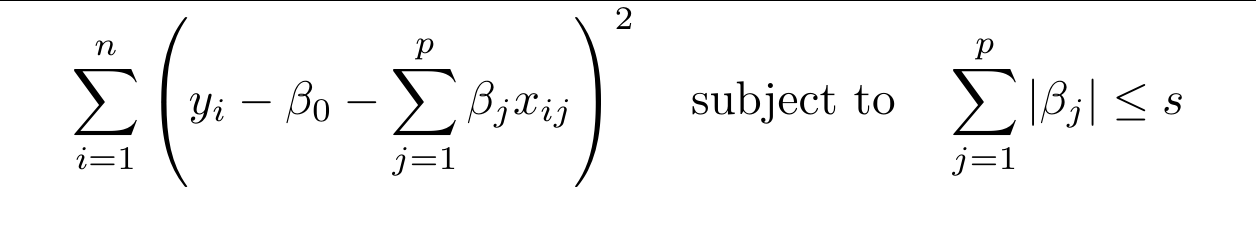

a) As we increase s from 0, the training RSS will:

i. Increase initially, and then eventually start decreasing in an
inverted U shape.

False, la curva se reducira mientras el valor de s incrementa y eventualmente se aplanra mientras mas grande sea s.

ii. Decrease initially, and then eventually start increasing in a
U shape.

Falso, dado que estamos con el training set el valor se ira reduciendo ya que con incrementos en los predictores el RSS training caera continuamente.

iii. Steadily increase.

False, la suma se ira progresivamente para 0

iv. Steadily decrease.

True

v. Remain constant.

False dado que mientras mas predictores haya en RSS training se ira reduciendo.




En el caso de **Test RSS**
Esto es dado que al inicio con el aporte de nuevos predictores se incrementara la varianza esto significa que hay overfitting.

EN el caso de la **Varianza**

Tenemos que constantemente estara incrementando dado que el modelo sera mas flexible.

En el caso de **Bias**

con s aumentando tenemos que el modelo sera mas flexible lo que significa que el bias se reducira dado que nos acercaremos mas al modelo definido, sin embargo tambien se incrementara la varianza.


## 4

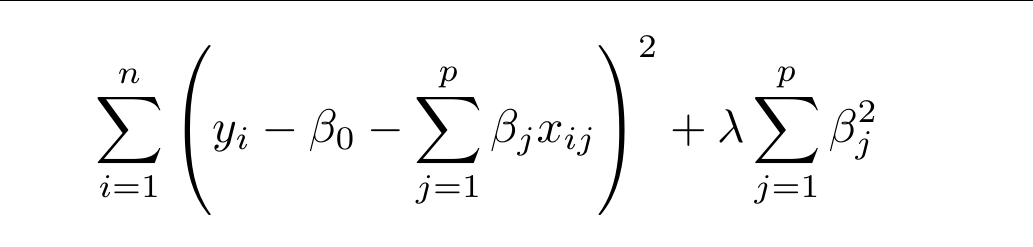

(a) As we increase λ from 0, the training RSS will:

i. Increase initially, and then eventually start decreasing in an
inverted U shape.

ii. Decrease initially, and then eventually start increasing in a
U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant.

a) El RSS training estara constantemente incrementandose iniciando en los valores de los coeficientes de OLS que minimizan RSS. y cuando lambda incremente el RSS training incrementara hasta llega al valor del null model.

b) En el caso del **RSS test** sera ii decrease intially y luego increase in a U shape cuando tenemos incrementos en lambda quiere decir que el modelo es menos flexible lo que lo hace menos propenso a cambios en data set que significa menor varianza. Sin embargo esto tambien nos aleja del modelo real de los datos que significa una reduccion del bias. Por lo tanto tendremos un decrecimiento del RSS hasta cierto punto de inflexion en donde comenzaremos a tener un crecimiento del RSS dado que el bias sera mucho mayor.

c) En el caso de la varianza mientras lambda aumenta, esta se ira reduciendo constantemente

d) squared bias aumnentara cada vez mas y mas de forma explosiva

e) el error se mantiene constante

## 6 ....

## 7

Cuando p = 1 entonces dado el contexto del ridge regression podemos decir que:

$$(y_1 - \beta_1)^2 + \lambda \beta_1^2$$

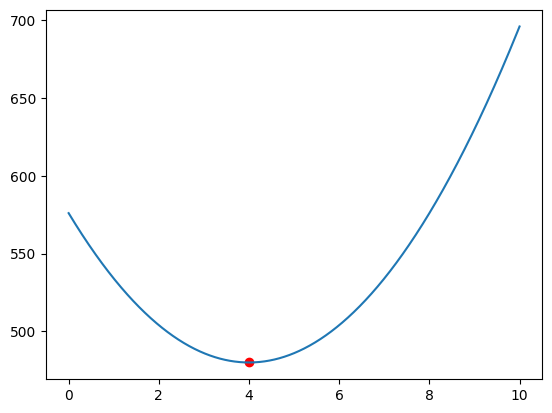

In [ ]:
# para algun valor de y1 y lambda tenemos que hacer un grafico en funcion
# de Beta
def f(y1, b1, lam):
  return (y1 - b1)**2 + lam* b1**2
b1 = np.linspace(0,10,1000)
y1 = 24
lam = 5
f_b1 = f(y1, b1, lam)
plt.plot(b1, f_b1)
plt.scatter(b1[np.argmin(f_b1)], np.min(f_b1), color="red")

np.float64(4.004004004004004)

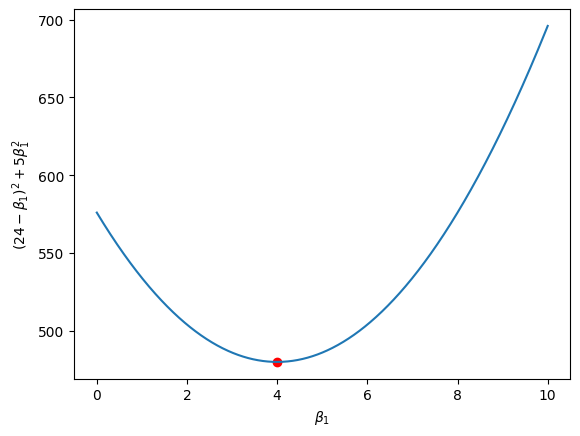

In [ ]:
def f(y1, lamda, beta1):
    return (y1 - beta1)**2 + lamda * beta1**2

lamda = 5
y1 = 24
beta1 = np.linspace(0, 10, 1000)
y_hat =  f(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} \\beta_1^2$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r');
beta1[np.argmin(y_hat)]

veamos el caso de lasso


np.float64(23.873873873873876)

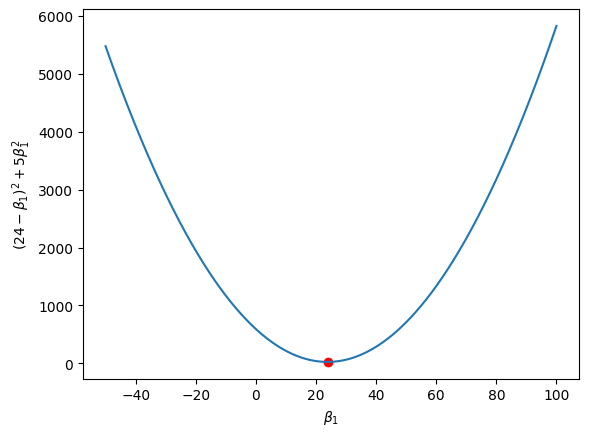

In [ ]:
def fl(y1, lamda, beta1):
    return (y1 - beta1) ** 2 + lamda * np.abs(b1)

lamda = 5
y1 = 24
beta1 = np.linspace(-50, 100, 1000)
y_hat =  fl(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} \\beta_1^2$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r');
beta1[np.argmin(y_hat)]


# Applied

## 8

In [4]:
# Vamos a simular data
#  media 0 desviacion estandar 1 y n = 100
# en el caso del ruido sera media 0 , desviacion 2 y size de 100

rng = np.random.default_rng(1)

x = rng.normal(size=100)
eps = rng.normal(size=100)

### b)


In [5]:
# Generando la response

b0 = 50
b1 = 44
b2 = 97
b3 = 5

y = b0 + b1*x + b2*x**2 + b3*x**3 + eps

### c)


In [6]:
# definiendo la funcion Cp
def nCp(sigma2, estimator, X, Y):
  n, p = X.shape
  Y_hat = estimator.predict(X)
  RSS = np.sum((Y - Y_hat)**2)
  Cp = -(RSS + 2*p*sigma2) / n
  return Cp
#

In [25]:
# vamos a definir el modelo con x hasta x a la 10
df = pd.DataFrame({f"X^{i}": x ** i for i in range(1, 11)})
df["y"] = y
df.head()

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,0.004929,0.001703,0.000589,0.000203,0.000070,0.000024,76.345344
1,0.821618,0.675056,0.554639,0.455701,0.374412,0.307624,0.252749,0.207663,0.170620,0.140185,155.267304
2,0.330437,0.109189,0.036080,0.011922,0.003940,0.001302,0.000430,0.000142,0.000047,0.000016,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236,4.897573,-6.382308,8.317150,-10.838554,14.124341,146.992225
4,0.905356,0.819669,0.742092,0.671858,0.608270,0.550701,0.498580,0.451393,0.408671,0.369993,174.272880


In [8]:
sigma2 = sm.OLS(y, df.drop("y", axis=1)).fit().scale
sigma2

np.float64(814.8803706928068)

In [9]:
neg_cp = partial(nCp, sigma2)

In [26]:
design = MS(df.columns.drop("y")).fit(df)
design.terms

Index(['X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10'], dtype='object')

In [11]:
X = design.transform(df).drop("intercept", axis=1)
X

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01
...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01


In [27]:
strategy = Stepwise.first_peak(design,
                               direction="forward",
                               max_terms=len(design.terms))


In [28]:
forward_model = sklearn_selected(sm.OLS,
                            strategy,
                            scoring=neg_cp)
forward_model.fit(df, y)
forward_model.selected_state_

('X^1', 'X^2', 'X^3')

In [29]:
print(forward_model.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.597e+05
Date:                Thu, 15 Jan 2026   Prob (F-statistic):          2.85e-194
Time:                        14:20:55   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.9428      0.120    416.437      0.0

### d) Veamos el caso con el backward

In [30]:
strategy = Stepwise.first_peak(design,
                                direction="backwards",
                                max_terms=len(design.terms))
backward_model = sklearn_selected(sm.OLS,
                                  strategy,
                                  scoring=neg_cp)
backward_model.fit(df, y)
backward_model.selected_state_

('X^1', 'X^2', 'X^3')

En ambos casos tenemos los mismos valores de predictores

### e)


Ahora vamos a implementar un modelo de Lasso con los 10 predictores. Usando Cross Validation para seleccionar el valor optimo del hiperparametro.

In [16]:
df = df.drop("y", axis=1)

In [31]:
df

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05,76.345344
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01,155.267304
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01,146.992225
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01,174.272880
...,...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03,383.762385
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09,46.860329
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15,51.725924
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01,170.421323


In [32]:
# Necesitamos scalar la data, definir un kfold y un pipeline
k = 5
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=0)
scaler = StandardScaler(with_mean=True,
                        with_std=True)



In [33]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[("scaler",scaler),
                         ("lasso", lassoCV)])
pipeCV.fit(df, y)
tunned_lasso = pipeCV.named_steps["lasso"]
print(tunned_lasso.alpha_)

0.1045257103559887


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+02, tolerance: 1.093e+02
  model = cd_fast.enet_coordinate_descent(


In [34]:
tunned_lasso.coef_

array([11.38099194, 34.58194918,  4.10876622,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       72.91968513])

In [35]:
df

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05,76.345344
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01,155.267304
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01,146.992225
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01,174.272880
...,...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03,383.762385
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09,46.860329
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15,51.725924
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01,170.421323


In [43]:
soln_array.shape

(10, 100)

In [45]:
lambdas, soln_array = skl.Lasso.path(df.drop("y", axis=1),
                                     y,
                                     l1_ratio=1,
                                     n_alphas=100)[:2]

sol_path = pd.DataFrame(soln_array.T,
                        columns=df.drop("y", axis=1).columns,
                        index=-np.log(lambdas))

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1017649129.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$-\log(\lambda)$",fontsize=29)


Text(0, 0.5, 'Standariced coefficients')

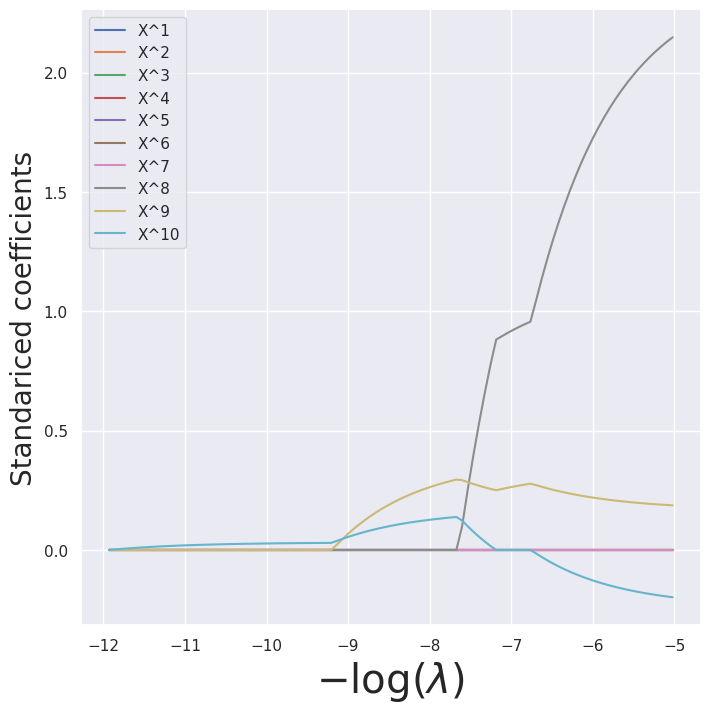

In [46]:
path_fig, ax = plt.subplots(figsize=(8,8))
sol_path.plot(ax=ax, legend=False)
ax.legend(loc="upper left")
ax.set_xlabel("$-\log(\lambda)$",fontsize=29)
ax.set_ylabel("Standariced coefficients", fontsize=20)



Ahora veamos el grafico de los MSE


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-3145876783.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


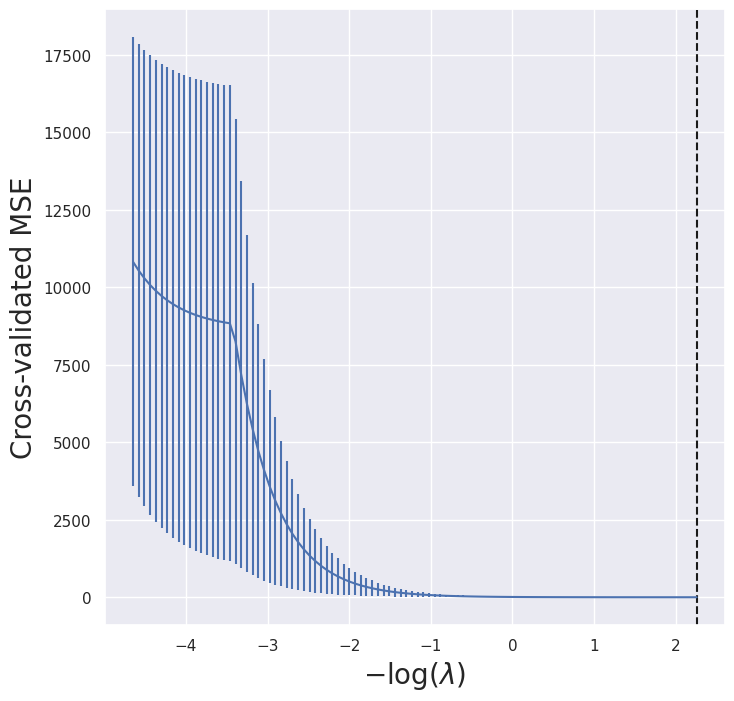

In [47]:
lasso_CV_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(tunned_lasso.alphas_),
            tunned_lasso.mse_path_.mean(1),
            yerr=tunned_lasso.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(tunned_lasso.alpha_),
          ls="--",
          c="k")
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [54]:
df

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05,76.345344
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01,155.267304
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01,146.992225
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01,174.272880
...,...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03,383.762385
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09,46.860329
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15,51.725924
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01,170.421323


ahora veamos el caso con un outer validation set.

In [55]:
outer_valid = skm.ShuffleSplit(n_splits=1,
                               test_size=0.25,
                               random_state=1)
k=5
inner_valid = skm.KFold(k,
                         shuffle=True,
                         random_state=2)
scaler = StandardScaler()
lasso_cv_valid = skl.ElasticNetCV(l1_ratio=1,
                                  cv=inner_valid)
pipe_lasso_v_cv = Pipeline(steps=[("scaler", scaler),
                                  ("lasso", lasso_cv_valid)])
results_lasso = skm.cross_validate(pipe_lasso_v_cv,
                                   df.drop("y", axis=1),
                                   y,
                                   cv=outer_valid,
                                   scoring="neg_mean_squared_error")
-results_lasso["test_score"]

array([0.95807935])

In [65]:
pipe_lasso_v_cv.fit(df.drop("y", axis=1), y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-4195913183.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

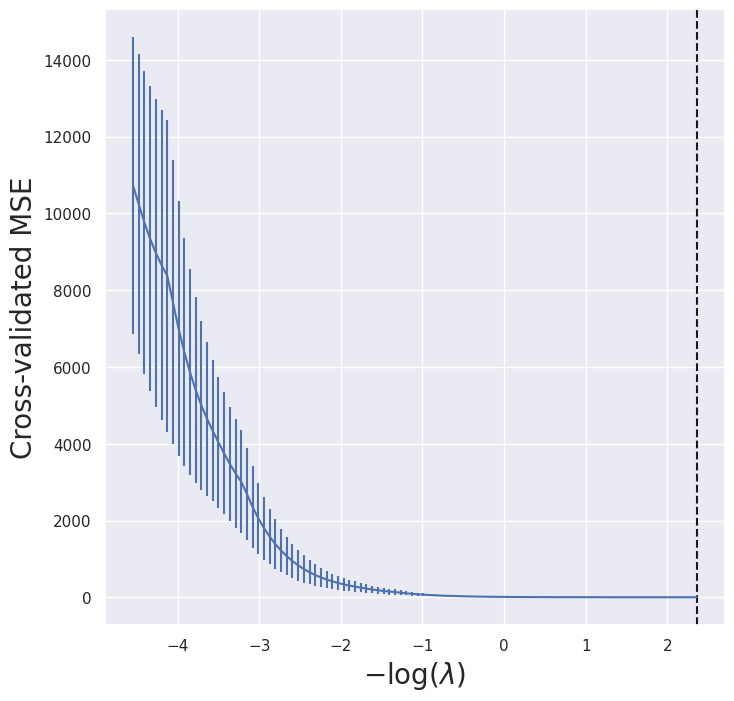

In [66]:
tunned_lasso_cv = pipe_lasso_v_cv.named_steps["lasso"]
lambdas = tunned_lasso_cv.alphas_
lasso_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tunned_lasso_cv.mse_path_.mean(1),
            yerr=tunned_lasso_cv.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(tunned_lasso_cv.alpha_), c="k", ls="--")

ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [67]:
tunned_lasso_cv.coef_

array([ 3.73534163e+01,  1.14483615e+02,  1.43824335e+01,  0.00000000e+00,
        0.00000000e+00,  2.05614973e-01, -0.00000000e+00,  8.29412867e-02,
       -0.00000000e+00,  5.53145176e-02])

In [74]:
# des scale
scaler = pipe_lasso_v_cv.named_steps["scaler"]
np.set_printoptions(suppress=True, precision=6)
tunned_lasso_cv.coef_ / scaler.scale_

array([43.864859, 96.639103,  4.976221,  0.      ,  0.      ,  0.00479 ,
       -0.      ,  0.000276, -0.      ,  0.000026])

### f)

In [80]:
b0 = 23
b7 = 50

new_y = b0 + b7 * x  ** 7 + eps

Hallando mediante el uso de forward stepwise

In [82]:
df = pd.DataFrame({f"X^{i}": x ** i for i in range(1, 11)})
df["y"] = new_y

df.head()


,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,0.004929,0.001703,0.000589,0.000203,0.000070,0.000024,123.402249
1,0.821618,0.675056,0.554639,0.455701,0.374412,0.307624,0.252749,0.207663,0.170620,0.140185,136.010286
2,0.330437,0.109189,0.036080,0.011922,0.003940,0.001302,0.000430,0.000142,0.000047,0.000016,123.394323
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236,4.897573,-6.382308,8.317150,-10.838554,14.124341,-195.742563
4,0.905356,0.819669,0.742092,0.671858,0.608270,0.550701,0.498580,0.451393,0.408671,0.369993,148.301837


In [83]:
design = MS(df.columns.drop("y")).fit(df)

strategy = Stepwise.first_peak(design,
                                direction="forward",
                                max_terms=len(design.terms))
forward_model = sklearn_selected(sm.OLS,
                                 strategy,
                                 scoring=neg_cp)
forward_model.fit(df, new_y)
forward_model.selected_state_

('X^7',)

ahora veamos el enfoque de the lasso

In [102]:
scaler = StandardScaler()
k = 5

outer_val = skm.ShuffleSplit(n_splits=1,
                             test_size=0.25,
                             random_state=1)

inner_fold = skm.KFold(k,
                       shuffle=True,
                       random_state=2)

lasso = skl.ElasticNetCV(l1_ratio=1,
                       cv=inner_fold)

pipe = Pipeline(steps=[("scaler", scaler),
                      ("lasso", lasso)])

results = skm.cross_validate(pipe,
                             design.transform(df),
                             new_y,
                             cv=outer_valid,
                             scoring="r2")
-results["test_score"]

array([-0.999705])

In [100]:
pipe.fit(design.transform(df), new_y)
lasso_cv = pipe.named_steps["lasso"]
scaler = pipe.named_steps["scaler"]
lasso_cv.coef_ / scaler.scale_

array([  0.      , -27.857723,   0.      ,   0.      ,  -0.      ,
        52.206685,  -0.      ,  31.187236,  -0.      ,   1.600316,
        -0.      ])